In [1]:
version()

'SageMath version 9.3, Release Date: 2021-05-09'

In [2]:
%display latex

In [3]:
#Definición de variedad y variables
Man = Manifold(4, 'Man ', r'\mathcal{M}')
M, ap = var('M ap')
e_var = var( 'e_var', latex_name=r'\varepsilon')
l_var = var('l_var', latex_name=r'l')
bet = var('bet', latex_name=r'\beta')
Omeg = var('Omeg', latex_name=r'\Omega')
alp = var('alp', latex_name=r'\alpha')
#Coordenadas de Boyer-Lindquist
BL.<t,r,th,ph> = Man.chart(r't r:(0,+oo) th:(0,pi):\theta ph:\phi')

In [4]:
#variedad R3
R2=Manifold(2,'R^2', latex_name=r'\mathbb{R}^2') 
#carta en R2
X2.<x,y>=R2.chart()
to_R2=Man.diff_map(R2, {(BL,X2): [r*sin(th)*cos(ph), r*sin(th)*sin(ph)]})
to_R2.display()

Man  --> R^2
   (t, r, th, ph) |--> (x, y) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th))

In [5]:
#Definición de la métrica
fr_MOG=1-2*(1+alp)*M/r+alp*(1+alp)*M^2/r^2
fr=fr_MOG
g = Man.lorentzian_metric('g')
g[0,0] = -fr
g[1,1] = 1/fr
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
ginv = g.inverse ()
show (g. display ())

g = (-M^2*(alp + 1)*alp/r^2 + 2*M*(alp + 1)/r - 1) dt*dt + 1/(M^2*(alp + 1)*alp/r^2 - 2*M*(alp + 1)/r + 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [6]:
#Horizontes de eventos
r_he   = M*((1+alp)+sqrt(1+alp))
r_he_0 = r_he.subs(M=1, alp=0.0) #alpha = 0.0
r_he_1 = r_he.subs(M=1, alp=0.1) #alpha = 0.1
r_he_2 = r_he.subs(M=1, alp=0.2) #alpha = 0.2

In [7]:
#Definiciones y cálculos previos
l_fun = r*sqrt(e_var^2/fr-1)
e_circ = sqrt(2*fr^2/(2*fr-r*diff(fr,r)))
Omeg=fr/r^2*l_var/e_var
epsi = (fr-Omeg^2*r^2)^(-1/2)
La=epsi*fr
Veff = 1/2*(fr*(1+l_var^2/r^2)-1)

#Representación visual de los agujeros negros
C0= circle ((0 ,0) ,r_he_0, fill = True , rgbcolor ='black')
C1= circle ((0 ,0) ,r_he_1, fill = True , rgbcolor ='black')
C2= circle ((0 ,0) ,r_he_2, fill = True , rgbcolor ='black')

In [8]:
### Datos
r0=4
alp0=0
E=e_circ.subs(r=4, M=1, alp=alp0)
L=l_fun.subs(M=1, e_var = E, r=r0)
bet0=0

In [9]:
E #energía

1

In [10]:
L.subs(alp=0), L.subs(alp=0.1), L.subs(alp=0.2) #Momentos angulares

(4, 4.36125209496554, 4.74912801127427)

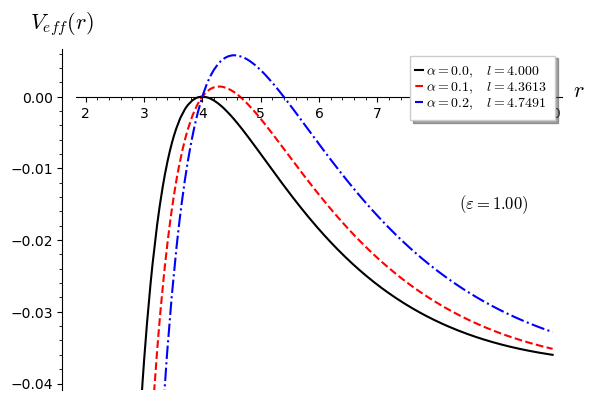

In [11]:
Vl(r) = 1/2*(fr*(1+L^2/r^2)-1)
graph = plot(Vl.subs(alp=0, M=1)(r), (r, r_he_0,5*r_he_0), thickness=1.5, ymin=-0.04,
             axes_labels=[r'$r$', r'$V_{eff} (r)$'], rgbcolor=(0, 0, 0), linestyle='-', legend_label=r'$\alpha=0.0,\quad l=4.000$')
graph +=plot(Vl.subs(alp=0.1, M=1)(r), (r, r_he_0,5*r_he_0), thickness=1.5, ymin=-0.04,
             axes_labels=[r'$r$', r'$V_{eff} (r)$'], rgbcolor=(1, 0, 0), linestyle='--', legend_label=r'$\alpha=0.1,\quad l=4.3613$')
graph +=plot(Vl.subs(alp=0.2, M=1)(r), (r, r_he_0,5*r_he_0), thickness=1.5, ymin=-0.04,
             axes_labels=[r'$r$', r'$V_{eff} (r)$'], rgbcolor=(0, 0, 1), linestyle='-.', legend_label=r'$\alpha=0.2,\quad l=4.7491$')
graph +=text(r'$(\varepsilon=1.00)$', (4.5*r_he_0, -0.015), color='black', fontsize=12)
graph

In [12]:
#Punto y vector tangente inicial
pt=-E/g[0,0].expr().subs(r=r0, M=1)
pph=L/g[3,3].expr().subs(r=r0, M=1, th=pi/2)
p = Man.point((0, r0, pi/2, 0), name='p')
Tp = Man.tangent_space(p)
v0 = Tp((pt.subs(alp=0  ), 0, 0, pph.subs(alp=0)))
v1 = Tp((pt.subs(alp=0.1), 0, 0, pph.subs(alp=0.1)))
v2 = Tp((pt.subs(alp=0.2), 0, 0, pph.subs(alp=0.2)))

#EDs con campo magnético
Eqns=zero_vector(SR, len(BL[:]))
D = BL.symbolic_velocities()
Eqns[0]=-E*diff(fr,r)/fr^2*D[1]
Eqns[1]=fr*(L^2/r^3+bet/2*diff(La,r))-diff(fr,r)/2*(1+L^2/r^2-bet*La.subs(e_var=E, l_var=L))
Eqns[2]=0
Eqns[3]=-2*L/r^3*D[1]
c0 = Man.integrated_curve(Eqns.subs(M=1, bet=0, alp=0  ), D, (ap,0,40), v0, name='c0')
c1 = Man.integrated_curve(Eqns.subs(M=1, bet=0, alp=0.1), D, (ap,0,11.5), v1, name='c1')
c2 = Man.integrated_curve(Eqns.subs(M=1, bet=0, alp=0.2), D, (ap,0,8), v2, name='c2')

sol0 = c0.solve(step=0.05 , verbose=False)
sol1 = c1.solve(step=0.05 , verbose=False)
sol2 = c2.solve(step=0.05 , verbose=False)

Q0=[[k*cos(m)*sin(l),k*sin(m)*sin(l)] for i,j,k,l,m in sol0]
Q1=[[k*cos(m)*sin(l),k*sin(m)*sin(l)] for i,j,k,l,m in sol1]
Q2=[[k*cos(m)*sin(l),k*sin(m)*sin(l)] for i,j,k,l,m in sol2]

Cur0=line(Q0, rgbcolor=(1, 0, 0), thickness=1) #rojo, alpha = 0
Cur1=line(Q1, rgbcolor=(0, 1, 0), thickness=1) #verde, alpha = 0.1
Cur2=line(Q2, rgbcolor=(0, 0, 1), thickness=1) #azul, alpha = 0.2

P2d=p.plot(chart=X2, mapping=to_R2, size=50)

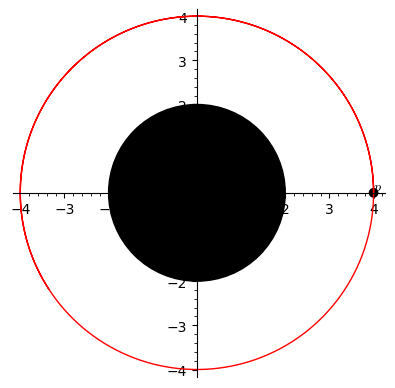

In [13]:
show(Cur0+C0+P2d)
#show(Cur0+Sp0+Punto, viewer='tachyon', aspect_ratio=1)

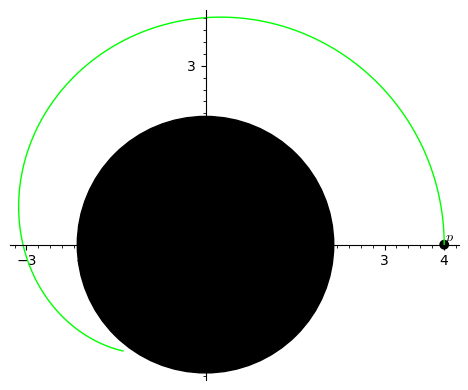

In [14]:
#show(Cur1+Sp1+Punto, viewer='tachyon', aspect_ratio=1)
show(Cur1+C1+P2d, aspect_ratio=1)

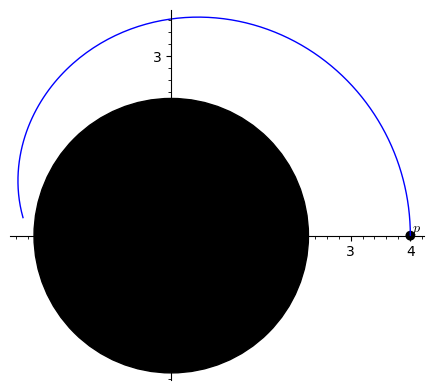

In [15]:
#show(Cur2+Sp2+Punto, viewer='tachyon', aspect_ratio=1)
show(Cur2+C2+P2d, aspect_ratio=1)